In [58]:
import pandas
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib as plt
import scipy
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [92]:
import sklearn

In [59]:
pandas.set_option('display.max_rows', 500)

Preprocessing

In [60]:
df_bow = pandas.read_csv("G:\\Master\\Thesis revision\\Datasets\\BOW_final.csv")
df_CTM = pandas.read_csv("G:\\Master\\Thesis revision\\Datasets\\CTM_Final.csv")
df_Bert = pandas.read_csv("G:\\Master\\Thesis revision\\Datasets\\Bert_Final.csv")

In [61]:
#initiating feature transformers
vectorizer_model = CountVectorizer()
transformer = MaxAbsScaler()
le = preprocessing.LabelEncoder()

In [62]:
df_Bert

,review_text,V20
0,cool great stage design awesome music pleasant...,0
1,fun achievement do not work 10 fun good like j...,0
2,time pass click pick great playing whilst watc...,0
3,wellthoughtout beautifully design take think o...,0
4,underrated graphic 10 fun good like just great...,0
...,...,...
29025,nope potato moldy rotten decay potato 10 fun g...,1
29026,get nephew like do not see shoot ragdoll super...,1
29027,buggy laggy good pc unplayable recommend 10 fu...,1
29028,suck ball 10 fun good like just great really b...,1


In [63]:
#making all the features ready
BagofWords = vectorizer_model.fit_transform(df_bow["V2"].values)
BagofWordsCTM = vectorizer_model.fit_transform(df_CTM["review_text"].values)
BagofWordsBert = vectorizer_model.fit_transform(df_Bert["review_text"].values)

recommendations = df_bow["V3"].values


In [128]:
df_bow["V3"].value_counts()

0    14518
1    14512
Name: V3, dtype: int64

In [64]:
#scaling the features
recommendations = le.fit_transform(recommendations)

In [65]:
#splitting the sets
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(BagofWords, recommendations, stratify= recommendations, random_state = 101)
CTM_X_train, CTM_X_test, CTM_y_train, CTM_y_test = train_test_split(BagofWordsCTM, recommendations, stratify= recommendations, random_state = 101)
Bert_X_train, Bert_X_test, Bert_y_train, Bert_y_test = train_test_split(BagofWordsBert, recommendations, stratify= recommendations, random_state = 101)

In [94]:
metric = ["accuracy", "f1", "recall", "precision"]

In [95]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

Linear support vector machine

In [96]:
SVM = LinearSVC(random_state=101)

In [97]:
parameters_SVM = {"C": np.logspace(-4, 4, 20)} 

In [103]:
#BOW https://stackoverflow.com/questions/57986374/how-to-fix-the-error-for-multi-metric-scoring-for-oneclasssvm-and-gridsearchcv
GridSearchCV_SVM_BOW = GridSearchCV(SVM, parameters_SVM, verbose=1, scoring= metric, n_jobs = 2, return_train_score = True, refit= "accuracy")
GridSearchCV_SVM_BOW.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",GridSearchCV_SVM_BOW.best_estimator_)
print("\\n The best score across ALL searched params:\\n",GridSearchCV_SVM_BOW.best_score_)
print("\\n The best parameters across ALL searched params:\\n",GridSearchCV_SVM_BOW.best_params_)
print(GridSearchCV_SVM_BOW.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.03359818286283781, random_state=101)
\n The best score across ALL searched params:\n 0.8100312788905196
\n The best parameters across ALL searched params:\n {'C': 0.03359818286283781}
{'mean_fit_time': array([0.01967206, 0.02486324, 0.02491636, 0.0226264 , 0.01986508,
       0.02191229, 0.03073153, 0.05955639, 0.12177782, 0.22514849,
       0.5778295 , 0.62423573, 0.63571401, 0.74254184, 0.78314166,
       0.70492516, 0.70077639, 0.75454526, 0.75363188, 0.70930829]), 'std_fit_time': array([0.00085143, 0.00436994, 0.00273729, 0.00213038, 0.00073966,
       0.00298017, 0.0018603 , 0.00873154, 0.01577398, 0.03593999,
       0.0798363 , 0.04962473, 0.09571336, 0.03382806, 0.06284051,
       0.01854709, 0.01279097, 0.01842273, 0.03012344, 0.01340985]), 'mean_score_time': array([0.00624204, 0.0070714 , 0.00734963, 0.00679331, 0.00645

In [132]:
from tabulate import tabulate
df = pandas.DataFrame(GridSearchCV_SVM_BOW.cv_results_)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)
print(pdtabulate(df))

+-----------------+----------------+-------------------+------------------+-----------------+-------------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+----------------------+---------------------+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-----------------------+----------------------+------------------+------------------+------------------+------------------+------------------+----------------+---------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+-------------------+--------------------+-----------------------+-----------------------+

In [104]:
#BOW final
SVM_final_BOW = GridSearchCV_SVM_BOW.best_estimator_
SVM_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_SVM = SVM_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_SVM)
print(classification_report(bow_y_test, bow_y_pred_SVM))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      3630
           1       0.83      0.78      0.80      3628

    accuracy                           0.81      7258
   macro avg       0.81      0.81      0.81      7258
weighted avg       0.81      0.81      0.81      7258



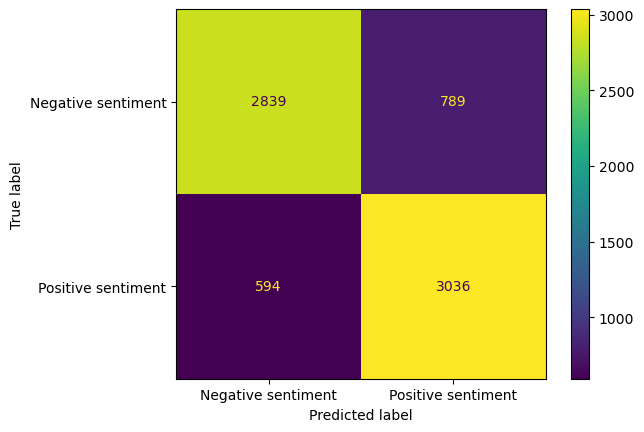

In [105]:
#confusion matrix
cm_norm = confusion_matrix(bow_y_test, bow_y_pred_SVM, labels=[1,0])
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()

In [106]:
#CTM
GridSearchCV_SVM_CTM = GridSearchCV(SVM, parameters_SVM, verbose=1, scoring=metric, n_jobs = 2, return_train_score = True, refit= "accuracy")
GridSearchCV_SVM_CTM.fit(CTM_X_train, CTM_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",GridSearchCV_SVM_CTM.best_estimator_)
print("\\n The best score across ALL searched params:\\n",GridSearchCV_SVM_CTM.best_score_)
print("\\n The best parameters across ALL searched params:\\n",GridSearchCV_SVM_CTM.best_params_)
print(GridSearchCV_SVM_CTM.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.03359818286283781, random_state=101)
\n The best score across ALL searched params:\n 0.8033254349432302
\n The best parameters across ALL searched params:\n {'C': 0.03359818286283781}
{'mean_fit_time': array([0.04166446, 0.02614741, 0.02620702, 0.0296032 , 0.03173342,
       0.04137621, 0.07500453, 0.11510901, 0.21878395, 0.57011342,
       0.98738375, 0.96494613, 0.96869192, 1.03934679, 0.93994226,
       0.94097834, 0.97084322, 0.95948901, 0.96421943, 0.99561524]), 'std_fit_time': array([0.01085561, 0.00175142, 0.00306661, 0.00737222, 0.00376376,
       0.00592148, 0.00962948, 0.00702209, 0.01337013, 0.06022292,
       0.06368492, 0.08764715, 0.05834446, 0.03663863, 0.04256633,
       0.02067384, 0.03938588, 0.02536063, 0.05425105, 0.03629523]), 'mean_score_time': array([0.0063592 , 0.00590334, 0.00562639, 0.00618663, 0.00745

In [133]:
df = pandas.DataFrame(GridSearchCV_SVM_CTM.cv_results_)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)
print(pdtabulate(df))

+-----------------+----------------+-------------------+------------------+-----------------+-------------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+----------------------+---------------------+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-----------------------+----------------------+------------------+------------------+------------------+------------------+------------------+----------------+---------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+-------------------+--------------------+-----------------------+-----------------------+

In [107]:
#CTM final
SVM_final_CTM = GridSearchCV_SVM_BOW.best_estimator_
SVM_final_CTM.fit(CTM_X_train, CTM_y_train)
CTM_y_pred_SVM = SVM_final_BOW.predict(CTM_X_test)
#test score
print(f1_score(CTM_y_test, CTM_y_pred_SVM))
print(classification_report(CTM_y_test, CTM_y_pred_SVM))

0.7965380249716232
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      3630
           1       0.82      0.77      0.80      3628

    accuracy                           0.80      7258
   macro avg       0.80      0.80      0.80      7258
weighted avg       0.80      0.80      0.80      7258



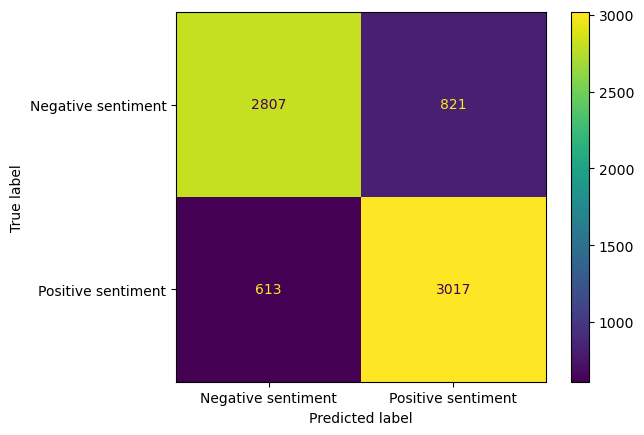

In [108]:
cm_norm = confusion_matrix(CTM_y_test, CTM_y_pred_SVM, labels=[1,0])
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()

In [109]:
#Bert
GridSearchCV_SVM_Bert = GridSearchCV(SVM, parameters_SVM, verbose=1, scoring=metric, n_jobs = 2, return_train_score = True, refit= "accuracy")
GridSearchCV_SVM_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",GridSearchCV_SVM_Bert.best_estimator_)
print("\\n The best score across ALL searched params:\\n",GridSearchCV_SVM_Bert.best_score_)
print("\\n The best parameters across ALL searched params:\\n",GridSearchCV_SVM_Bert.best_params_)
print(GridSearchCV_SVM_Bert.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.03359818286283781, random_state=101)
\n The best score across ALL searched params:\n 0.8096178553893196
\n The best parameters across ALL searched params:\n {'C': 0.03359818286283781}
{'mean_fit_time': array([0.02715478, 0.04176564, 0.03372464, 0.02896953, 0.02770324,
       0.03454499, 0.05115786, 0.09966526, 0.18734956, 0.43336387,
       0.86690478, 0.88255873, 0.91310716, 0.90534067, 1.12160897,
       1.05998201, 0.96166701, 0.94619255, 1.01204824, 1.02451539]), 'std_fit_time': array([0.00281148, 0.0241827 , 0.00789509, 0.00287409, 0.00339318,
       0.00164452, 0.00219029, 0.01349555, 0.01403346, 0.02299064,
       0.02570548, 0.04602698, 0.04938416, 0.02109655, 0.17053237,
       0.08737036, 0.02003954, 0.02730319, 0.00807502, 0.04256808]), 'mean_score_time': array([0.00651774, 0.00740356, 0.00680747, 0.00578241, 0.00653

In [134]:
df = pandas.DataFrame(GridSearchCV_SVM_Bert.cv_results_)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)
print(pdtabulate(df))

+-----------------+----------------+-------------------+------------------+-----------------+-------------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+----------------------+---------------------+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-----------------------+----------------------+------------------+------------------+------------------+------------------+------------------+----------------+---------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+-------------------+--------------------+-----------------------+-----------------------+

In [110]:
#Bert final
SVM_final_Bert = GridSearchCV_SVM_Bert.best_estimator_
SVM_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_SVM = SVM_final_Bert.predict(Bert_X_test)
#test score
print(f1_score(Bert_y_test, Bert_y_pred_SVM))
print(classification_report(Bert_y_test, Bert_y_pred_SVM))

0.8018707482993196
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      3630
           1       0.83      0.78      0.80      3628

    accuracy                           0.81      7258
   macro avg       0.81      0.81      0.81      7258
weighted avg       0.81      0.81      0.81      7258



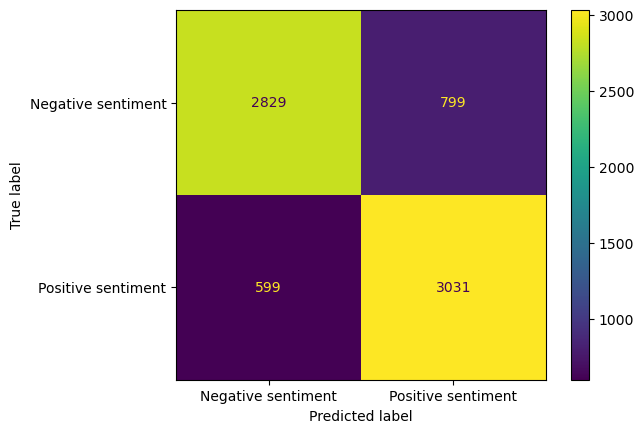

In [111]:
cm_norm = confusion_matrix(Bert_y_test, Bert_y_pred_SVM, labels=[1,0])
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()

XGBoost

In [112]:
XGB = XGBClassifier(verbosity = 1, seed = 101, use_label_encoder=False)

In [113]:
parameters_XGB = {"max_depth": [1,4,5,6,7,8,9,10], "eta": [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

In [114]:
#BOW
GridSearchCV_XGB = GridSearchCV(XGB, parameters_XGB, verbose=1, scoring=metric, n_jobs = 2, return_train_score = True, refit= "accuracy")
GridSearchCV_XGB.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",GridSearchCV_XGB.best_estimator_)
print("\\n The best score across ALL searched params:\\n",GridSearchCV_XGB.best_score_)
print("\\n The best parameters across ALL searched params:\\n",GridSearchCV_XGB.best_params_)
print(GridSearchCV_XGB.cv_results_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[22:34:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.8, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.800000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              s

In [136]:
df = pandas.DataFrame(GridSearchCV_XGB.cv_results_)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)
print(pdtabulate(df))

+-----------------+----------------+-------------------+------------------+-------------+-------------------+-------------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+----------------------+---------------------+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-----------------------+----------------------+------------------+------------------+------------------+------------------+------------------+----------------+---------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+-------------------+--------------------+-----------------------+--------

In [115]:
#BOW final
XGB_final_BOW = GridSearchCV_XGB.best_estimator_
XGB_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_XGB = XGB_final_BOW.predict(bow_X_test)
#test score
print(f1_score(bow_y_test, bow_y_pred_XGB))
print(classification_report(bow_y_test, bow_y_pred_XGB))

[22:34:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7951052931132613
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      3630
           1       0.82      0.77      0.80      3628

    accuracy                           0.80      7258
   macro avg       0.80      0.80      0.80      7258
weighted avg       0.80      0.80      0.80      7258



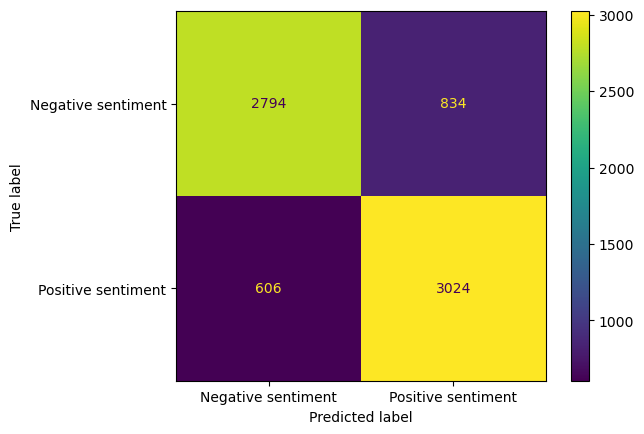

In [116]:
cm_norm = confusion_matrix(bow_y_test, bow_y_pred_XGB, labels=[1,0])
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()

In [117]:
#CTM
GridSearchCV_XGB_CTM = GridSearchCV(XGB, parameters_XGB, verbose=1, scoring=metric, n_jobs = 2, return_train_score = True, refit= "accuracy")
GridSearchCV_XGB_CTM.fit(CTM_X_train, CTM_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",GridSearchCV_XGB_CTM.best_estimator_)
print("\\n The best score across ALL searched params:\\n",GridSearchCV_XGB_CTM.best_score_)
print("\\n The best parameters across ALL searched params:\\n",GridSearchCV_XGB_CTM.best_params_)
print(GridSearchCV_XGB_CTM.cv_results_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[22:37:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.7, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.699999988,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=

In [137]:
df = pandas.DataFrame(GridSearchCV_XGB_CTM.cv_results_)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)
print(pdtabulate(df))

+-----------------+----------------+-------------------+------------------+-------------+-------------------+-------------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+----------------------+---------------------+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-----------------------+----------------------+------------------+------------------+------------------+------------------+------------------+----------------+---------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+-------------------+--------------------+-----------------------+--------

In [118]:
#CTM final
XGB_final_CTM = GridSearchCV_XGB_CTM.best_estimator_
XGB_final_CTM.fit(CTM_X_train, CTM_y_train)
XGB_y_pred_CTM = XGB_final_CTM.predict(CTM_X_test)
#test score
print(f1_score(CTM_y_test, XGB_y_pred_CTM))
print(classification_report(CTM_y_test, XGB_y_pred_CTM))

[22:37:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7872908758610995
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      3630
           1       0.80      0.77      0.79      3628

    accuracy                           0.79      7258
   macro avg       0.79      0.79      0.79      7258
weighted avg       0.79      0.79      0.79      7258



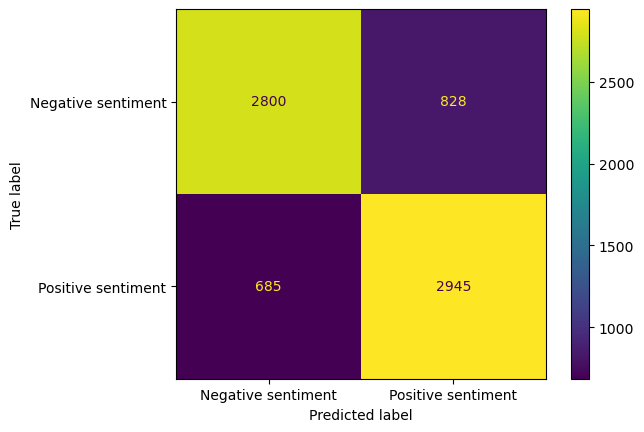

In [119]:
cm_norm = confusion_matrix(CTM_y_test, XGB_y_pred_CTM, labels=[1,0])
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()

In [120]:
#BERTopic
GridSearchCV_XGB_Bert = GridSearchCV(XGB, parameters_XGB, verbose=2, scoring=metric, n_jobs = 2, return_train_score = True, refit= "accuracy")
GridSearchCV_XGB_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",GridSearchCV_XGB_Bert.best_estimator_)
print("\\n The best score across ALL searched params:\\n",GridSearchCV_XGB_Bert.best_score_)
print("\\n The best parameters across ALL searched params:\\n",GridSearchCV_XGB_Bert.best_params_)
print(GridSearchCV_XGB_Bert.cv_results_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[22:40:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.5, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_

In [138]:
df = pandas.DataFrame(GridSearchCV_XGB_Bert.cv_results_)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)
print(pdtabulate(df))

+-----------------+----------------+-------------------+------------------+-------------+-------------------+-------------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+----------------------+---------------------+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-----------------------+----------------------+------------------+------------------+------------------+------------------+------------------+----------------+---------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+-------------------+--------------------+-----------------------+--------

In [122]:
#BERT final
XGB_final_Bert = GridSearchCV_XGB_Bert.best_estimator_
XGB_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_XGB = XGB_final_Bert.predict(Bert_X_test)
#test score
print(f1_score(Bert_y_test, Bert_y_pred_XGB))
print(classification_report(Bert_y_test, Bert_y_pred_XGB))

[22:40:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7982165971523084
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      3630
           1       0.83      0.76      0.80      3628

    accuracy                           0.81      7258
   macro avg       0.81      0.81      0.81      7258
weighted avg       0.81      0.81      0.81      7258



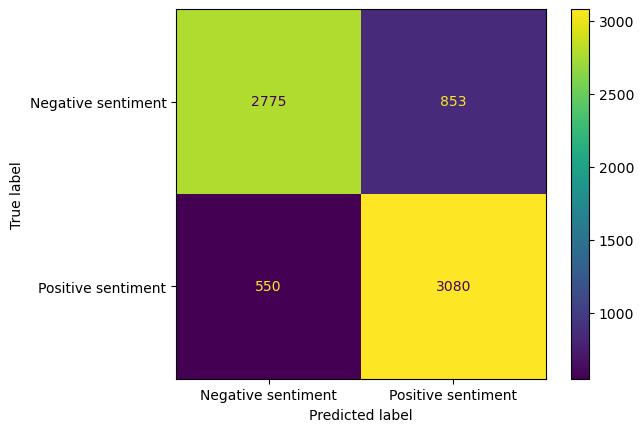

In [123]:
cm_norm = confusion_matrix(Bert_y_test, Bert_y_pred_XGB, labels=[1,0])
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()